# Project: Heart Disease Classification

## Objective
- To predict whether the patient has Cardiovascular Disease (heart disease).

## Dataset
- The information of the patient from Cleveland, Hungarian, Switzerland, and Long Beach VA which those databases can be found from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/.
- The dataset can be downloaded at https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction.

**heart**
- This table contains the information about the patient who have a high risk having a heart disease.
- Here is the description of all columns.

| Column Name                     | Criteria |
|---------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Age                             | Integer, age of the patient (year). |
| Sex                             | Character, gender of the patient. (Male [M] or Female [F]) |
| ChestPainType                   | Character, type of the chest pain. (Typical Angina [TA], Atypical Angina [ATA], Non-Anginal Pain [NAP], Asymptomatic [ASY]) |
| RestingBP                       | Integer, resting blood pressure (mmHg).  |
| Cholesterol                     | Integer, serum cholesterol (mm/dl). |
| FastingBS                       | Integer, fasting blood pressure. (FastingBS > 120 mg/dl [1] or otherwise [0]) |
| RestingECG                      | Character, resting electrocardiogram results. (Normal [Normal], Having ST-T wave abnormality [ST], showing left ventricular hypertrophy [LVH]) |
| MaxHR                           | Integer, maximum heart rate achieved. |
| ExerciseAngina                  | Character, exercise-induced angina. (Yes [Y] or No [N]) |
| Oldpeak                         | Numeric, ST oldpeak value measured in depression. |
| ST_Slope                        | Character, the slope of the peak exercise ST segment. (Up, Flat, or Down) |
| HeartDisease                    | Numeric, output class. (Heart disease [1], Normal [0]) |


In [ ]:
# Import all libraries required for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### 1. Import the Data

In [ ]:
# Import the dataset
heart = pd.read_csv('./data/heart.csv')

In [ ]:
# View the first rows of the dataset
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
# General information
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
# The number of rows and columns
print('The dataset contains: {} rows, {} columns'.format(heart.shape[0], heart.shape[1]))

The dataset contains: 918 rows, 12 columns


In [ ]:
# The data type in each column
heart.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [ ]:
# Number of unique values
heart.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [ ]:
# Check for duplicated value
print('There is {} duplicated rows.'.format(heart.duplicated().sum()))

There is 0 duplicated rows.


In [ ]:
# Check for missing values
heart.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### 2. Clean the Data

In [ ]:
# Change the data type of FastingBS and HeartDisease to 'category'
heart.FastingBS = heart.FastingBS.astype('category')
heart.HeartDisease = heart.HeartDisease.astype('category')
# Recheck the data type
heart.dtypes

Age                  int64
Sex                 object
ChestPainType       object
RestingBP            int64
Cholesterol          int64
FastingBS         category
RestingECG          object
MaxHR                int64
ExerciseAngina      object
Oldpeak            float64
ST_Slope            object
HeartDisease      category
dtype: object

### Data Validation
**OBSERVATION**
- The imported dataset contains 918 rows, 12 columns.
- Among 12 columns, there are 5 numerical and 7 categorical variables.
- The data has neither missing values nor duplicated rows.

**DATA CLEANING**
- Change the data type of FastingBS and HeartDisease to 'category'.

### 3. Exploratory Data Analysis

In [ ]:
# Descriptive Statistics
heart.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2


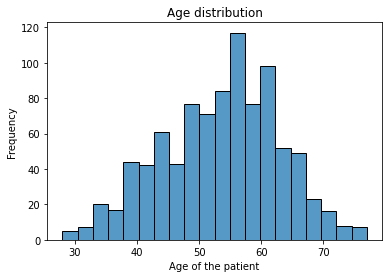

In [ ]:
# Visualize the HISTOGRAM of the age of the patients
ax = sns.histplot(x='Age', data=heart, bins=20)
ax.set(xlabel='Age of the patient', ylabel='Frequency', title='Age distribution')
plt.show()

In [ ]:
# The proportion of heart disease patient
heart['HeartDisease'].value_counts(normalize=True)

1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64

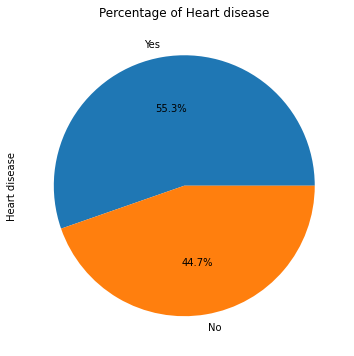

In [ ]:
# Visualize the PIE CHART to see the proportion of heart disease patient
heart_disease_class = heart['HeartDisease'].copy()
heart_disease_class.replace({1:'Yes', 0:'No'}, inplace=True)
ax = heart_disease_class.value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 6))
ax.set(ylabel='Heart disease', title='Percentage of Heart disease')
plt.show()

In [ ]:
# The average resting blood pressure in each gender
heart.groupby('Sex')['RestingBP'].mean()

Sex
F    132.212435
M    132.445517
Name: RestingBP, dtype: float64

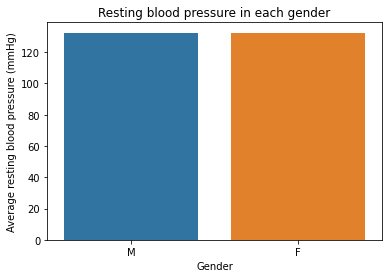

In [ ]:
# Visualize the BAR CHART to see the average resting blood pressure in each gender
ax = sns.barplot(x='Sex', y='RestingBP', data=heart, ci=None)
ax.set(xlabel='Gender', ylabel='Average resting blood pressure (mmHg)', title='Resting blood pressure in each gender')
plt.show()

In [ ]:
# Create the column age_group
heart_agegroup = heart.copy()
heart_agegroup['age_group'] = pd.Series(
    np.where(heart_agegroup['Age'] < 40, 'Below 40',
             np.where(heart_agegroup['Age'] <= 60, 
                      'Between 40 and 60', 'Above 60')))
# The average resting blood pressure in each age group
heart_agegroup.groupby('age_group')['RestingBP'].mean().sort_values()

age_group
Below 40             123.887500
Between 40 and 60    131.504052
Above 60             137.968326
Name: RestingBP, dtype: float64

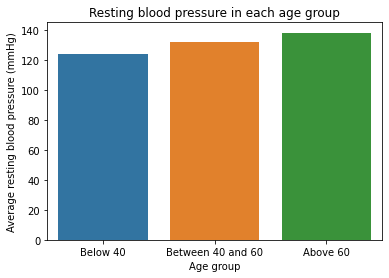

In [ ]:
# Visualize the BAR CHART to see the average resting blood pressure in each age group
ax = sns.barplot(x='age_group', y='RestingBP', data=heart_agegroup,
                 order=['Below 40', 'Between 40 and 60', 'Above 60'], ci=None)
ax.set(xlabel='Age group', ylabel='Average resting blood pressure (mmHg)',
       title='Resting blood pressure in each age group')
plt.show()

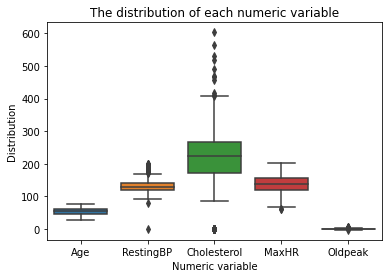

In [ ]:
# Visualize the BOXPLOT to see the distribution for each variable
numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
ax = sns.boxplot(x='variable', y='value', data=heart[numeric_features].melt())
ax.set(xlabel='Numeric variable', ylabel='Distribution', title='The distribution of each numeric variable')
plt.show()

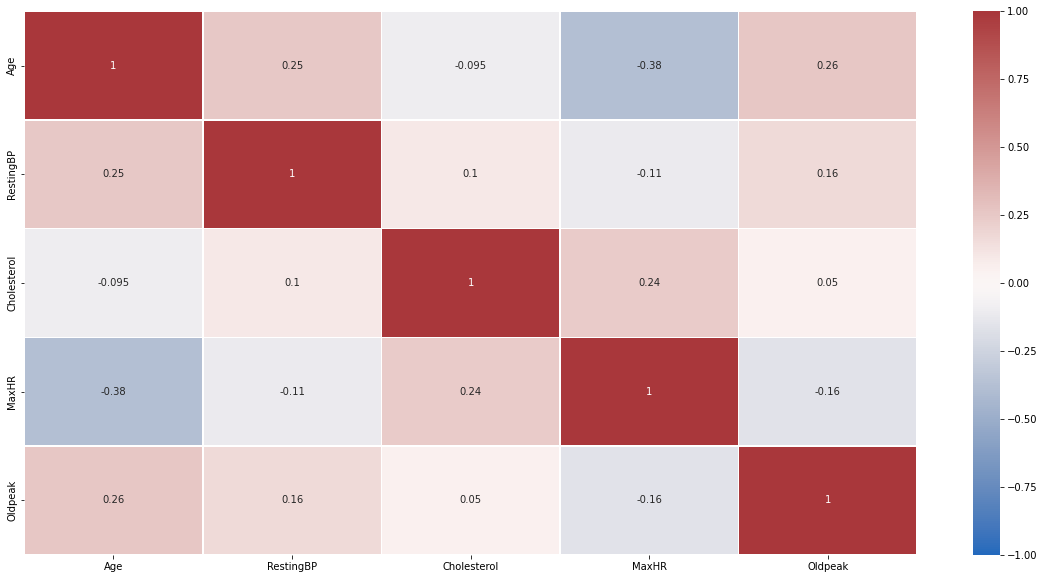

In [ ]:
# Visualize the HEATMAP to observe the correlation between pairs of numerical variables
plt.figure(figsize=[20, 10])
sns.heatmap(heart.corr(), annot=True, linewidths=0.5, vmin=-1, vmax=1, cmap='vlag')
plt.show()

### 4. Preprocess the data
- Since each numeric variables are distributed in different scales, they need to be rescaled in order to prevent bias in training the model.

In [ ]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
# Index of the features
numeric_features = [0, 3, 4, 7, 9]
categorical_features = [1, 2, 5, 6, 8, 10]

In [ ]:
# Feature Engineering
X, y = heart.drop('HeartDisease', axis=1).values, heart['HeartDisease'].values
# Split the data to training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Transform data
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Data Preprocessing
data_preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

**SUMMARY**
- According to the histogram, the age of the members is within the range of 28 to 77 years with the average of 53 years old.
- According to the pie chart, there is 55.3% of all patient who receive positive result.
- According to the bar chart, the average resting blood pressure is the same for both Male and Female.
- According to the second bar chart, the average resting blood pressure tends to increase as the patient is in the older group.
- According to the boxplot, each variables are distributed within different range which may cause BIAS in the training session.
- According to the heatmap, we cen tell that there is no strong correlation among the numeric variables.

**PREPROCESS THE DATA**
- Select the features and target assigned to arrays.
- Splited the dataset to training set and test set.
- Create pipeline for Data Preprocessing including:
  - Standardize the numeric features to scaling the data to the same range.
  - Encode the categorical features using OneHotEncoder

### 5. Model Fitting
- Model 1: Logistic Regression
- Model 2: K-Nearest Neighbors
- Model 3: Decision Tree
- Model 4: Random Forest

#### **Model 1: Logistic Regression**

In [ ]:
# Model 1: Logistic Regression
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', data_preprocessor), 
    ('classifier', LogisticRegression())
])
param_grid = {'classifier__solver': ["newton-cg", "lbfgs"],
         'classifier__C': [0.0001, 0.001, 0.01, 1]}
kf = KFold(n_splits=5, shuffle=True, random_state=84)
model_cv = GridSearchCV(logreg_pipeline, param_grid=param_grid, cv=kf)

In [ ]:
# Model Fitting
model_cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=84, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         [0, 3,
                                                                          4, 7,
                                                                          9]),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                   

In [ ]:
model_logreg = model_cv.best_estimator_
print('Best hyperparameters: {}'.format(model_cv.best_params_))

Best hyperparameters: {'classifier__C': 1, 'classifier__solver': 'newton-cg'}


#### **Model 2: K-Nearest Neighbors**

In [ ]:
# Model 2: K-Nearest Neighbors
knn_pipeline = Pipeline(steps=[
    ('preprocessor', data_preprocessor), 
    ('classifier', KNeighborsClassifier())
])
param_grid = {'classifier__n_neighbors': np.arange(1, 11)}
kf = KFold(n_splits=5, shuffle=True, random_state=84)
model_cv = GridSearchCV(knn_pipeline, param_grid=param_grid, cv=kf)

In [ ]:
# Model Fitting
model_cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=84, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         [0, 3,
                                                                          4, 7,
                                                                          9]),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                   

In [ ]:
model_knn = model_cv.best_estimator_
print('Best hyperparameters: {}'.format(model_cv.best_params_))

Best hyperparameters: {'classifier__n_neighbors': 7}


#### **Model 3: Decision Tree**

In [ ]:
# Model 3: Decision Tree
tree_pipeline = Pipeline(steps=[
    ('preprocessor', data_preprocessor), 
    ('classifier', DecisionTreeClassifier())
])
param_grid = {'classifier__criterion': ['gini', 'entropy']}
kf = KFold(n_splits=5, shuffle=True, random_state=84)
model_cv = GridSearchCV(tree_pipeline, param_grid=param_grid, cv=kf)

In [ ]:
# Model Fitting
model_cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=84, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         [0, 3,
                                                                          4, 7,
                                                                          9]),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                   

In [ ]:
model_tree = model_cv.best_estimator_
print('Best hyperparameters: {}'.format(model_cv.best_params_))

Best hyperparameters: {'classifier__criterion': 'entropy'}


#### **Model 4: Random Forest**

In [ ]:
# Model 4: Random Forest
forest_pipeline = Pipeline(steps=[
    ('preprocessor', data_preprocessor), 
    ('classifier', RandomForestClassifier(n_estimators=100))
])
param_grid = {'classifier__criterion': ['gini', 'entropy']}
kf = KFold(n_splits=5, shuffle=True, random_state=84)
model_cv = GridSearchCV(forest_pipeline, param_grid=param_grid, cv=kf)

In [ ]:
# Model Fitting
model_cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=84, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         [0, 3,
                                                                          4, 7,
                                                                          9]),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                   

In [ ]:
model_forest = model_cv.best_estimator_
print('Best hyperparameters: {}'.format(model_cv.best_params_))

Best hyperparameters: {'classifier__criterion': 'entropy'}


**EXPLANATION**
- The objective of this work is to predict whether the patient is having a heart disease. Hence, this project is a classification problem.
- The model used for training the dataset is including Logistic Regression, K-Nearest Neighbors, Decision Tree, and Random Forest.
- 5-Fold Cross Validation is also performed to prevent overfitting on the training set.
- Performed the hyperparameter tuning using GridSearchCV to find the optimal hyperparameter which yields the model with the highest accuracy.

### 6. Model Evaluation
- Model 1: Logistic Regression
- Model 2: K-Nearest Neighbors
- Model 3: Decision Tree
- Model 4: Random Forest

#### **Model 1: Logistic Regression**

In [ ]:
# Predict the output based on test data
y_pred = model_logreg.predict(X_test)
y_pred_prob = model_logreg.predict_proba(X_test)

In [ ]:
# Evaluate the model
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))
print('Confusion Matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))
print('ROC AUC score: {}'.format(roc_auc_score(y_test,y_pred_prob[:,1])))
print('\nClassification Report: \n{}'.format(classification_report(y_test, y_pred)))

Accuracy: 0.8532608695652174
Confusion Matrix: 
[[67 10]
 [17 90]]
ROC AUC score: 0.9270542541570579

Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



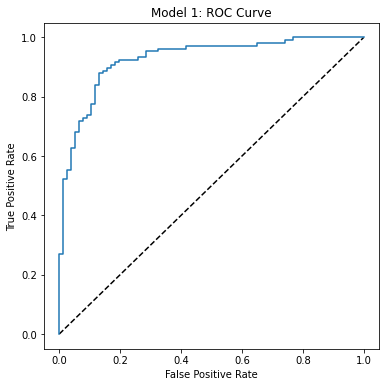

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Model 1: ROC Curve')
plt.show()

#### **Model 2: K-Nearest Neighbors**

In [ ]:
# Predict the output based on test data
y_pred = model_knn.predict(X_test)
y_pred_prob = model_knn.predict_proba(X_test)

In [ ]:
# Evaluate the model
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))
print('Confusion Matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))
print('ROC AUC score: {}'.format(roc_auc_score(y_test,y_pred_prob[:,1])))
print('\nClassification Report: \n{}'.format(classification_report(y_test, y_pred)))

Accuracy: 0.8641304347826086
Confusion Matrix: 
[[67 10]
 [15 92]]
ROC AUC score: 0.930877533681272

Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        77
           1       0.90      0.86      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



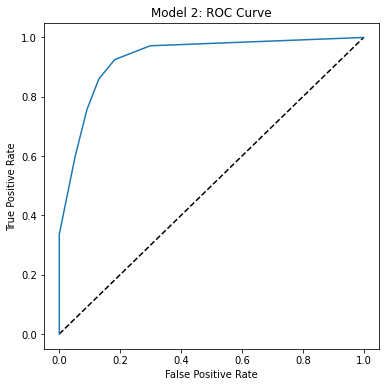

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Model 2: ROC Curve')
plt.show()

#### **Model 3: Decision Tree**

In [ ]:
# Predict the output based on test data
y_pred = model_tree.predict(X_test)
y_pred_prob = model_tree.predict_proba(X_test)

In [ ]:
# Evaluate the model
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))
print('Confusion Matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))
print('ROC AUC score: {}'.format(roc_auc_score(y_test,y_pred_prob[:,1])))
print('\nClassification Report: \n{}'.format(classification_report(y_test, y_pred)))

Accuracy: 0.7880434782608695
Confusion Matrix: 
[[68  9]
 [30 77]]
ROC AUC score: 0.801371525670591

Classification Report: 
              precision    recall  f1-score   support

           0       0.69      0.88      0.78        77
           1       0.90      0.72      0.80       107

    accuracy                           0.79       184
   macro avg       0.79      0.80      0.79       184
weighted avg       0.81      0.79      0.79       184



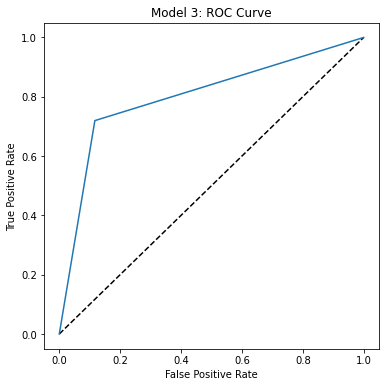

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Model 3: ROC Curve')
plt.show()

#### **Model 4: Random Forest**

In [ ]:
# Predict the output based on test data
y_pred = model_forest.predict(X_test)
y_pred_prob = model_forest.predict_proba(X_test)

In [ ]:
# Evaluate the model
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))
print('Confusion Matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))
print('ROC AUC score: {}'.format(roc_auc_score(y_test,y_pred_prob[:,1])))
print('\nClassification Report: \n{}'.format(classification_report(y_test, y_pred)))

Accuracy: 0.875
Confusion Matrix: 
[[67 10]
 [13 94]]
ROC AUC score: 0.9395557713314723

Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.87      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



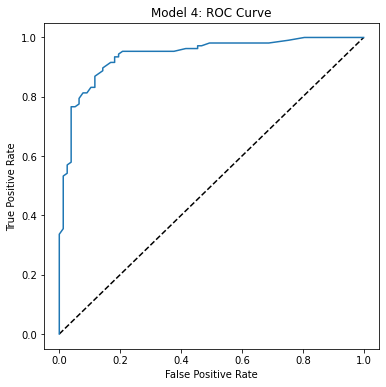

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Model 4: ROC Curve')
plt.show()

In [ ]:
# Compare the recall of each model
model_eva_dict = {
    'Model': ['LogisticRegression', 
              'KNeighborsClassifier', 
              'DecisionTreeClassifier',
              'RandomForestClassifier'],
    'Recall': [recall_score(y_test, model_logreg.predict(X_test)),
                             recall_score(y_test, model_knn.predict(X_test)),
                             recall_score(y_test, model_tree.predict(X_test)),
                             recall_score(y_test, model_forest.predict(X_test))
]}
model_compare = pd.DataFrame(model_eva_dict)
model_compare.sort_values('Recall', ascending=False).reset_index(drop=True)

,Model,Recall
0,RandomForestClassifier,0.878505
1,KNeighborsClassifier,0.859813
2,LogisticRegression,0.841121
3,DecisionTreeClassifier,0.719626


**EXPLANATION**
- The Accuracy score is one of the metrics for evaluating the model since it measures the rate of the correct prediction which is a common metric used to evaluate the supervised model in the classification problem.
- The confusion matrix displays the predictions including Type-I(False Positive) and Type-II(False Negative) errors.
- The ROC curve is also plotted to illustrates the diagnostic ability of the binary classifier system.
- The main metric used for comparison is recall since for the case of the prediction of the heart disease, we need to avoid the false negative error(predict those who is having a heart disease as NEGATIVE result).
- According to the evaluation results, the Random Forest model is the most well-performed and achieved very high recall.
- It is concluded that the Random Forest model has the best performance and would likely to be the best approach for predicting whether the patient is having a heart disease.